# 이미지 데이터 셋을 이용한 CNN Modeling
## Animals Dataset Categorical Classification
* Train_Data : 5000
* Valid_Data : 3000
* Test_Data : 3000

In [1]:
import warnings
warnings.filterwarnings('ignore')

* Import TensorFlow

In [2]:
import tensorflow as tf

tf.__version__

'2.12.0'

# I. wget From Github

> ## 1) 'animals_part.zip' 파일 다운로드

In [3]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.z{ip,01,02}

--2023-04-05 06:12:12--  https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88551715 (84M) [application/zip]
Saving to: ‘animals_part.zip’

animals_part.zip    100%[===================>]  84.45M   165MB/s    in 0.5s    

2023-04-05 06:12:13 (165 MB/s) - ‘animals_part.zip’ saved [88551715/88551715]

--2023-04-05 06:12:13--  https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.z01
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 94371840 (90M) [application/octet-stream]
Saving to: ‘animals_part.z01’

animals_part.z01    100%[===================>]  90.00M   189MB/s    in 0.5s    

2023-04-05 06:12:15 (189 

* 다운로드 결과 확인

In [4]:
!ls -l

total 270804
-rw-r--r-- 1 root root 94371840 Apr  5 06:12 animals_part.z01
-rw-r--r-- 1 root root 94371840 Apr  5 06:12 animals_part.z02
-rw-r--r-- 1 root root 88551715 Apr  5 06:12 animals_part.zip
drwxr-xr-x 1 root root     4096 Apr  3 13:38 sample_data


> ## 2) 분할된 파일 합치기

In [5]:
!zip -Fq animals_part.zip --out animals.zip

* 'animals.zip' 생성 확인

In [6]:
!ls -l

total 541604
-rw-r--r-- 1 root root  94371840 Apr  5 06:12 animals_part.z01
-rw-r--r-- 1 root root  94371840 Apr  5 06:12 animals_part.z02
-rw-r--r-- 1 root root  88551715 Apr  5 06:12 animals_part.zip
-rw-r--r-- 1 root root 277295391 Apr  5 06:12 animals.zip
drwxr-xr-x 1 root root      4096 Apr  3 13:38 sample_data


# II. Data Preprocessing

> ## 1) Unzip 'animals.zip'

In [7]:
!unzip -q /content/animals.zip

* 학습 데이터 확인

In [8]:
!ls -l animals/

total 12
drwxr-xr-x 12 root root 4096 Oct 25 13:50 test
drwxr-xr-x 12 root root 4096 Oct 25 13:50 train
drwxr-xr-x 12 root root 4096 Oct 25 13:50 validation


> ## 2) Image_File Directory Setting

* train_dir
* valid_dir
* test_dir

In [9]:
train_dir = 'animals/train'
valid_dir = 'animals/validation'
test_dir  = 'animals/test'

> ## 3) ImageDataGenerator( ) & flow_from_directory( )

* Normalization
 * ImageDataGenerator( )
* Resizing & Generator
 * flow_from_directory( )

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode = 'nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'categorical')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'categorical')

Found 5000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


> ## 4) Test train_generator

In [11]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20, 10)


In [12]:
labels_batch

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

# III. CNN Keras Modeling

 > ## 1) Import VGG-16 Model

In [13]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights= 'imagenet',
                  include_top = False,
                  input_shape = (150,150,3))

58889256/58889256 [==============================] - 0s 0us/step


> ## 2) Model Concatenate

* Feature Extraction & Classification

In [16]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 18,914,634
Trainable params: 18,914,634
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [18]:
from tensorflow.keras import optimizers
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(learning_rate = 0.000005) ,
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 25분

In [19]:
%%time

Hist_animal = model.fit(train_generator,
                        steps_per_epoch = 250,
                        epochs = 30,
                        validation_data = valid_generator,
                        validation_steps = 150)

Epoch 1/30
250/250 [==============================] - 80s 243ms/step - loss: 2.3755 - accuracy: 0.1378 - val_loss: 1.9867 - val_accuracy: 0.3093
Epoch 2/30
250/250 [==============================] - 60s 239ms/step - loss: 1.9043 - accuracy: 0.3302 - val_loss: 1.4623 - val_accuracy: 0.4803
Epoch 3/30
250/250 [==============================] - 60s 239ms/step - loss: 1.5310 - accuracy: 0.4658 - val_loss: 1.4833 - val_accuracy: 0.4753
Epoch 4/30
250/250 [==============================] - 60s 240ms/step - loss: 1.3381 - accuracy: 0.5246 - val_loss: 1.1460 - val_accuracy: 0.5870
Epoch 5/30
250/250 [==============================] - 60s 239ms/step - loss: 1.1900 - accuracy: 0.5794 - val_loss: 1.0635 - val_accuracy: 0.6517
Epoch 6/30
250/250 [==============================] - 60s 239ms/step - loss: 1.0602 - accuracy: 0.6360 - val_loss: 0.9227 - val_accuracy: 0.6930
Epoch 7/30
250/250 [==============================] - 60s 238ms/step - loss: 0.9653 - accuracy: 0.6650 - val_loss: 0.8466 - val_ac

> ## 4) 학습 결과 시각화

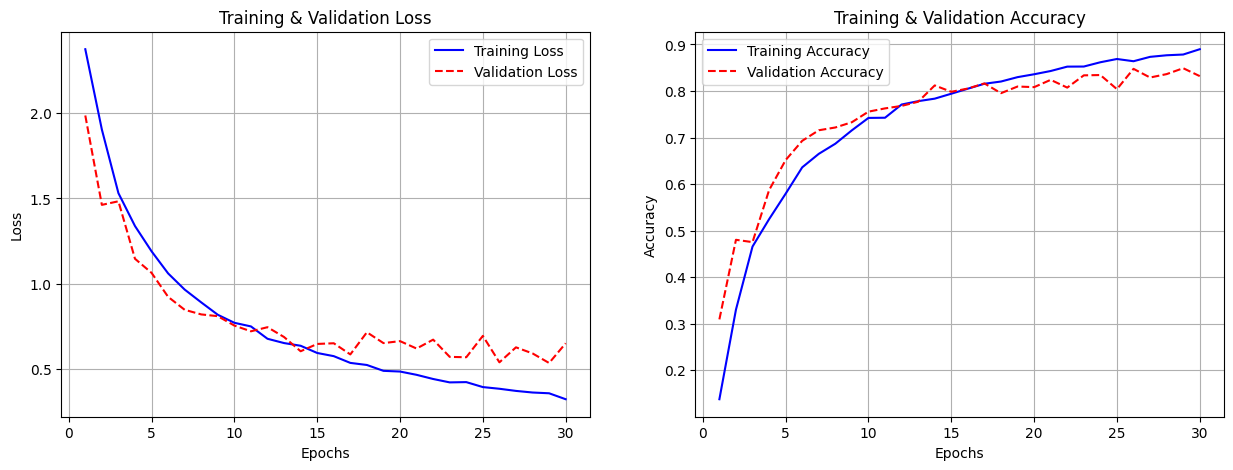

In [20]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_animal.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_animal.history['loss'], 'b-')
plt.plot(epochs, Hist_animal.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_animal.history['accuracy'], 'b-')
plt.plot(epochs, Hist_animal.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* test_generator

In [21]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'categorical')

Found 3000 images belonging to 10 classes.


* Loss & Accuracy

In [22]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 150, 
                                verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.65194
Accuracy = 0.82533


# 
# 
# 
# The End
# 
# 
# 